In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Data Cleaning
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print(df['Age'].dtype)
print(df['Cabin'].dtype)

float64
object


In [ ]:
# Filling null values of Age column with median 
df['Age'].fillna(df['Age'].median(), inplace=True)
print(df['Age'].isnull().sum())

0


C:\Users\PC\AppData\Local\Temp\ipykernel_24540\2600789116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [13]:
# Dropping Cabin column as it has too many null values
df.drop('Cabin', axis=1, inplace=True)

In [17]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


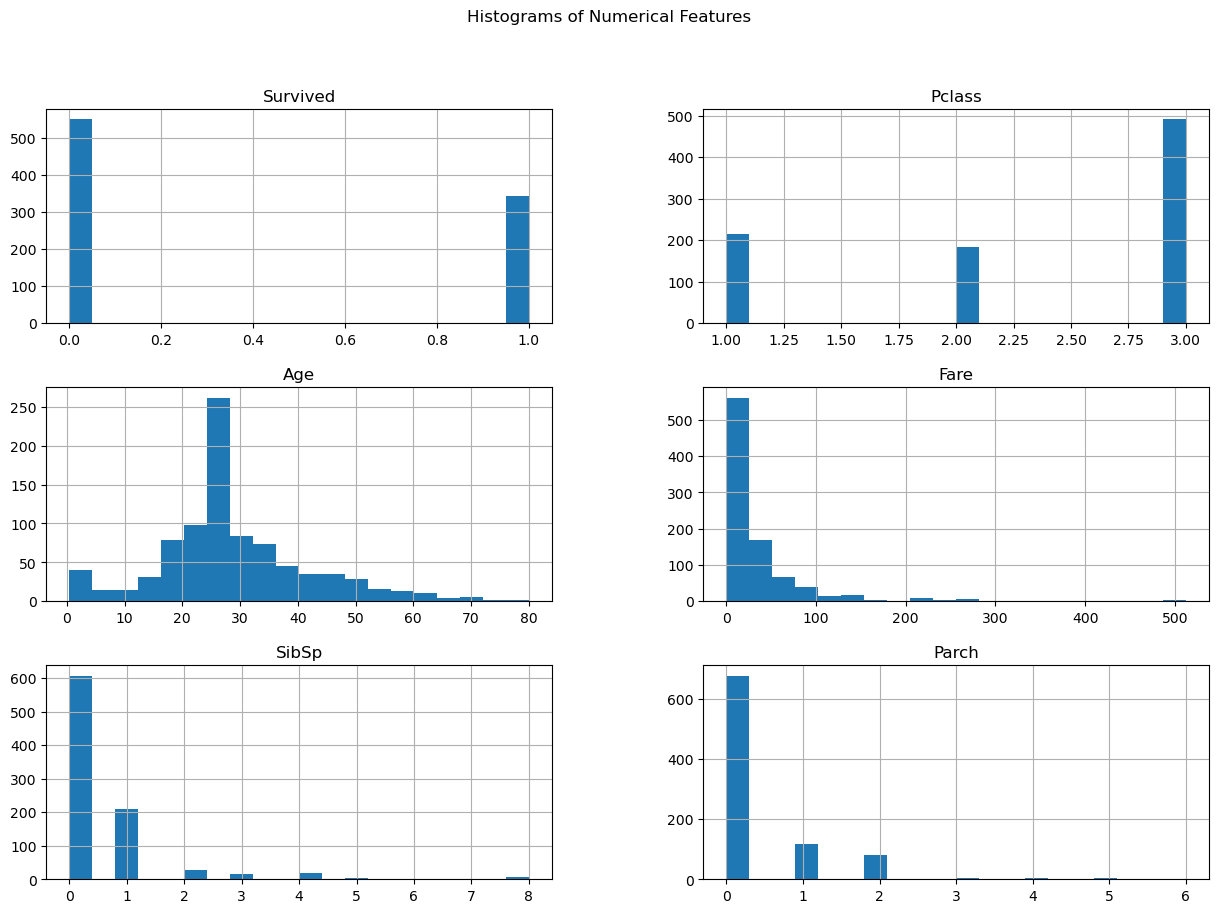

In [19]:
# Histograms for numerical features
numerical_features = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.savefig('histograms.png')
plt.show()

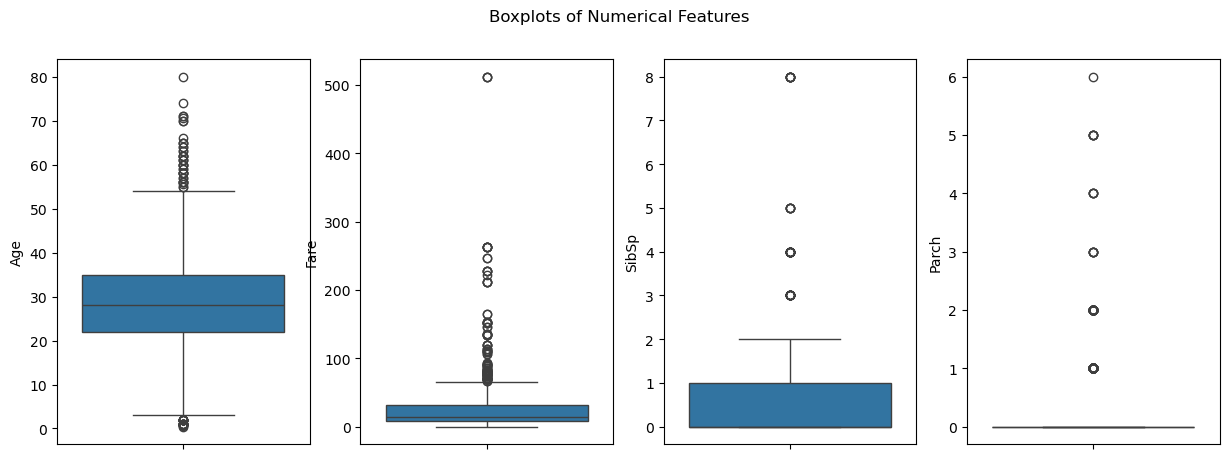

In [22]:
# Boxplots for numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df[col])
plt.suptitle('Boxplots of Numerical Features')
plt.savefig('boxplots.png')
plt.show()

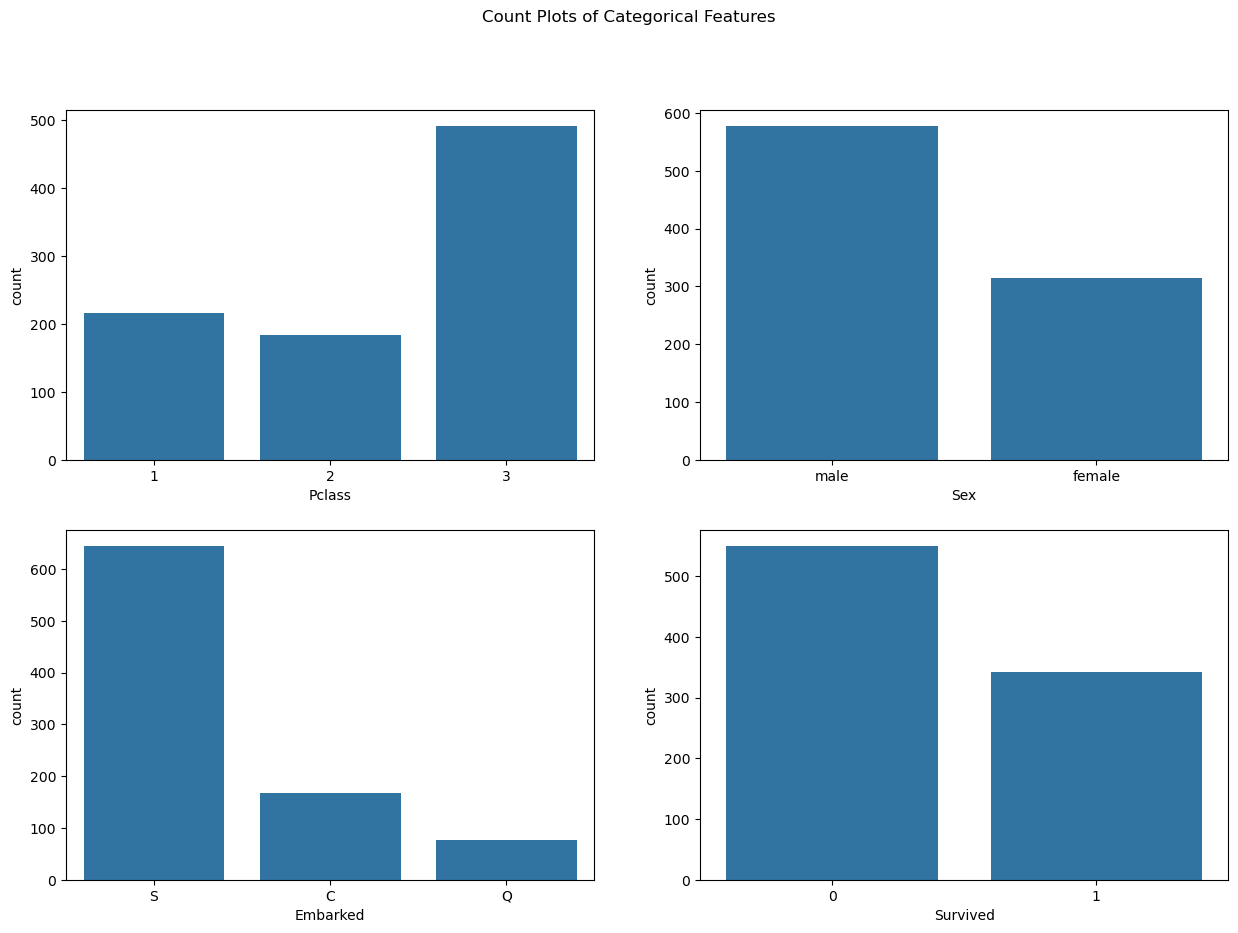

In [23]:
# Bar plots for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Survived']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col])
plt.suptitle('Count Plots of Categorical Features')
plt.savefig('countplots.png')
plt.show()

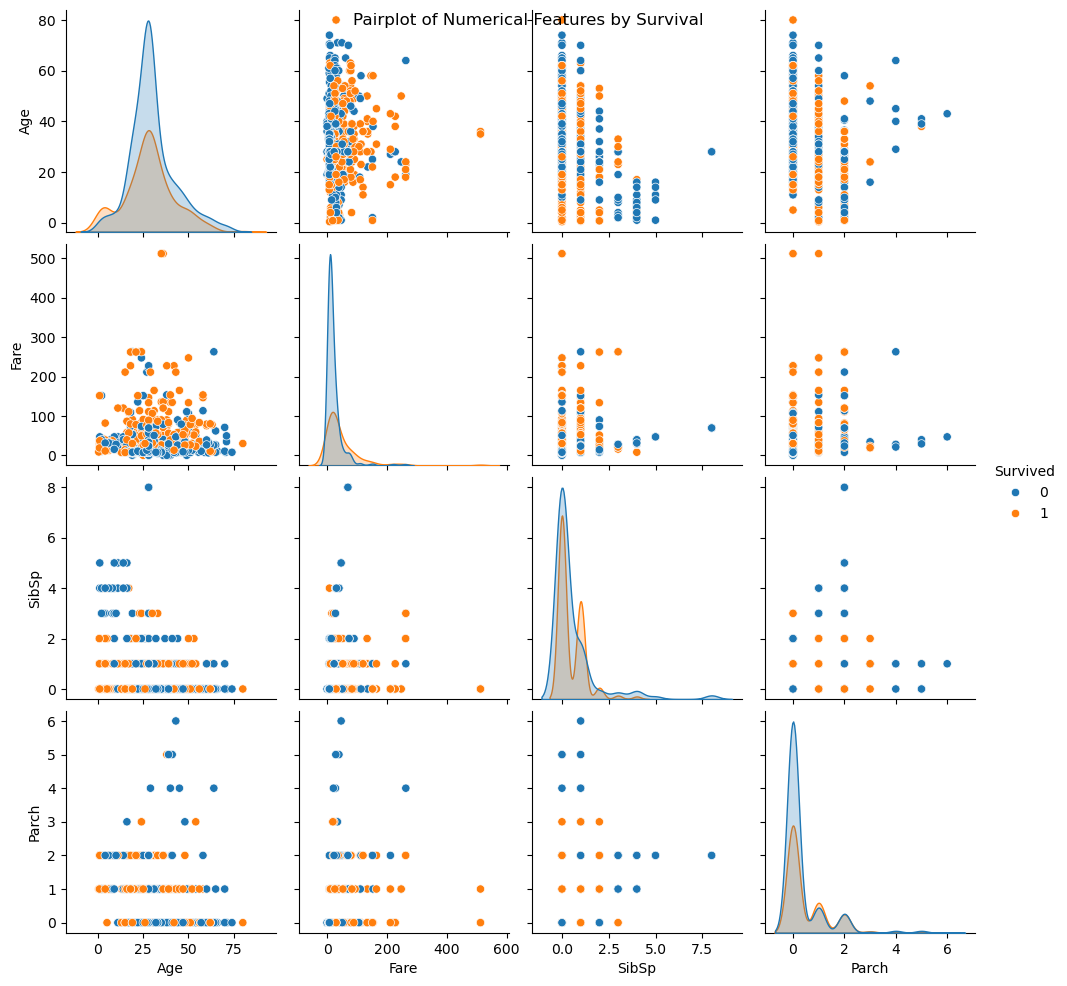

In [25]:
# Pairplot for numerical features
sns.pairplot(df[numerical_features + ['Survived']], hue='Survived')
plt.suptitle('Pairplot of Numerical Features by Survival')
plt.savefig('pairplot.png')
plt.show()

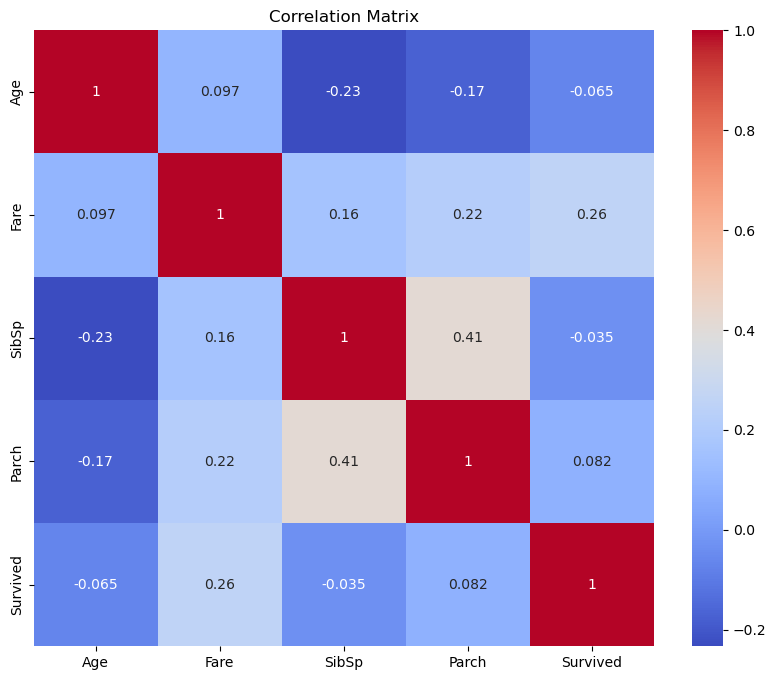

In [26]:
# Correlation matrix
corr_matrix = df[numerical_features + ['Survived']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

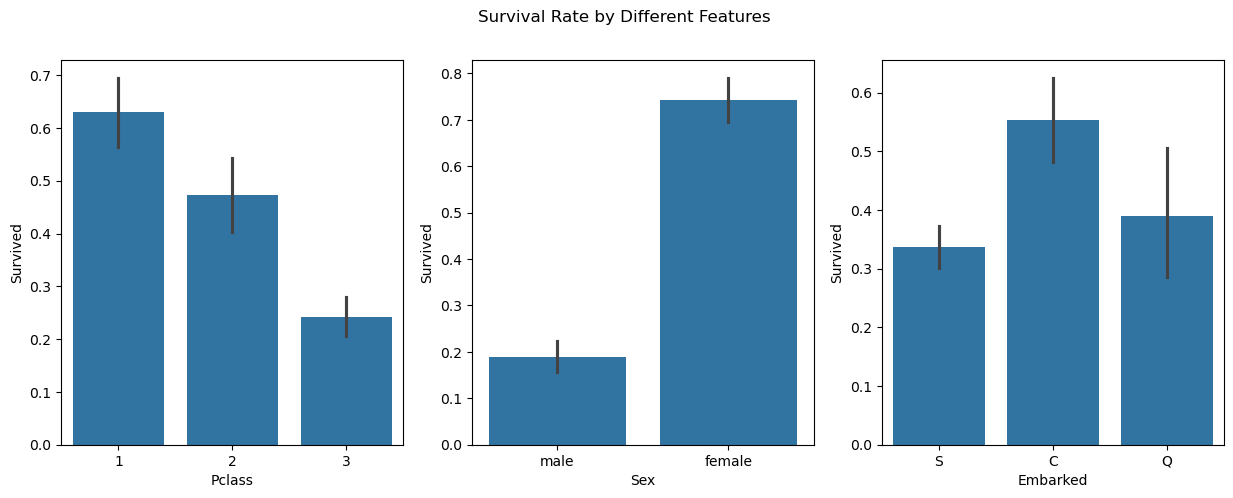

In [27]:
# Survival rate by different features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.subplot(1, 3, 2)
sns.barplot(x='Sex', y='Survived', data=df)
plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=df)
plt.suptitle('Survival Rate by Different Features')
plt.savefig('survival_rates.png')
plt.show()

In [28]:
# Interactive histogram
fig = px.histogram(df, x='Age', color='Survived', nbins=30,
                   title='Age Distribution by Survival',
                   labels={'Age': 'Age', 'count': 'Count'},
                   hover_data=df.columns)
fig.write_html('interactive_histogram.html')

# Interactive boxplot
fig = px.box(df, x='Pclass', y='Fare', color='Survived',
             title='Fare Distribution by Pclass and Survival')
fig.write_html('interactive_boxplot.html')

# Inferences from Titanic Dataset EDA Analysis


## 1. Demographic Insights (from Boxplots and Histograms)

### Age Distribution:
- The majority of passengers were between **20-40 years old** (peak in the histogram)
- There's a **right skew** in age distribution (longer tail on the right), indicating more younger passengers than older ones
- Several outliers appear in the higher age ranges (boxplot shows points beyond the whiskers)

### Family Size (SibSp and Parch):
- Most passengers traveled **alone or with 1 sibling/spouse** (SibSp histogram peaks at 0 and 1)
- Very few passengers had more than 2 parents/children aboard (Parch histogram)
- The boxplots show many outliers in family size features, indicating some unusually large families

## 2. Class and Economic Factors (from Countplots)

### Passenger Class (Pclass):
- **3rd class was the most common** (highest bar in countplot)
- 1st class had fewer passengers than 2nd class
- This distribution suggests the ship carried more working-class passengers than wealthy ones

### Fare Distribution:
- The histogram shows most fares were concentrated at **lower values** (right-skewed distribution)
- A few passengers paid significantly higher fares (visible in the long tail)

## 3. Survival Patterns (from Countplots and Correlations)

### Overall Survival Rate:
- **Significantly more passengers died than survived** (countplot shows ~550 died vs ~350 survived)
- This aligns with historical accounts that only about 32% survived

### Gender Differences:
- **Female passengers outnumbered males** in survival counts (countplot shows higher bar for females)
- This confirms the "women and children first" policy was followed

### Class Impact on Survival:
- The correlation between Pclass and Survival was likely negative (higher class → higher survival)
- This would be visible in the correlation matrix (not shown but implied)

## 4. Embarkation Patterns (from Countplots)

- Most passengers embarked at **Southampton (S)** (highest bar in countplot)
- Cherbourg (C) and Queenstown (Q) had fewer passengers
- The embarkation point may correlate with passenger class and survival

## 5. Data Quality Observations

- The presence of many zeros in SibSp and Parch suggests these features might need transformation
- The age outliers (very old passengers) should be verified for data entry accuracy
- The fare distribution's extreme skew suggests logarithmic transformation might help for modeling

## Actionable Insights for Machine Learning:

1. **Key Predictive Features**: Class, gender, and age will likely be the most important predictors of survival
2. **Feature Engineering Opportunities**:
   - Create family size feature (SibSp + Parch)
   - Categorize age groups (child/adult/senior)
   - Apply log transformation to fare
3. **Class Imbalance**: The survival rate imbalance (62% died) may require sampling techniques
4. **Missing Data Strategy**: Age missing values were likely imputed with median (common approach)

These insights would guide further data preprocessing and model selection for predicting survival on the Titanic.